# **데이터 크롤링**

## **크롤링이란?**
> 크롤러(crawler)는 자동화된 방법으로 웹을 탐색하는 컴퓨터 프로그램  
'웹 크롤링'(web crawling)??  
'데이터 크롤링'(data crawling)!!  

우리는 매일 크롤러도 사용하고 있습니다.

## **웹 크롤링**
> 웹 서비스 내 정보를 수집하는 일  
다만 서비스 제공자의 입장에서는??  

>> 필요한 정보가 있다면?  
API 확인 -> 없으면 직접 크롤링  

### 웹 서핑을 하는 의식의 흐름
> - 브라우저 오픈  
> - 원하는 인터넷페이지 주소 입력  
> - 화면이 열리면 찾고자 하는 정보를 스크롤 하면서 찾기  
> - 문자, 그림, 동영상 조회  

### 웹 크롤링 하는 의식의 흐름
> - 정보를 가져오고자 하는 url 정의
> - url 정보로 requests로 정보 요청
> - text 정보를 html로 변환
> - html에서 우리가 필요한 정보만 선별

## requests
> - HTTP 요청을 주고받기 위한 파이썬 패키지
> - 파이썬 내장 패키지는 아니지만 사실상 HTTP 요청을 주고받기 위한 표준이라 생각해도 무방함
> - 웹 페이지에 요청, 업데이트, 삭제 등 인터넷프로토콜을 파이썬으로 제어한다.
> - requests는 요청을 하고 데이터를 전달 받지만 text 혹은 바이너리 형태로만 전달받음.

## BeautifulSoup
> - API는 통신을 위해 정형화 된 데이터 형태의 text, json등을 통신에 사용한다.  
> - requests로 전달받은 데이터를 우리가 원하는 데이터로 가공하기 위해 편의상 html로 변환  
> - text를 html로 변환하는 모듈이 beautifulSoup

### BeautifulSoup 설치

In [3]:
# 패키지 설치 및 import 
# !pip install BeautifulSoup4
from bs4 import BeautifulSoup

## 간단한 데이터 크롤링으로 기본 개념잡기

In [4]:
# 필요패키지 import
import time
import json
import urllib
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 네이버 메인페이지 크롤링

([<img alt="미디어오늘" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/006.png"/>,
  <img alt="오마이뉴스" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/047.png"/>,
  <img alt="아시아경제" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/277.png"/>,
  <img alt="동아일보" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/020.png"/>,
  <img alt="스포츠조선" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/076.png"/>,
  <img alt="서울신문" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/up/2022/0208/nsd16121208.png"/>,
  <img alt="지지통신" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/376.png"/>,
  <img alt="연합뉴스TV" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/422.pn
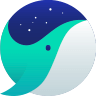
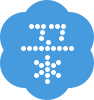

In [14]:
'''
정보를 가져오고자 하는 url 정의
url 정보로 requests로 정보 요청
text 정보를 html로 변환
html에서 우리가 필요한 정보만 선별
'''
# url정의
url = 'https://www.naver.com/'

# requsts로 url에 정보요청
resp = requests.get(url)

# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(resp.text, 'html.parser')

# html 내에서 우리가 보고 싶은 정보만 선별
html.select('img'), type(html.select('img.news_logo'))

#### 실제 개발자가 작성한 코드로 확인된다
> 정제되지 않은 데이터로 가독성이 좋지 않음  
우리는 이 중에서 우리가 원하는 정보를 선별해서 가져오는 작업을 진행합니다.  
그러기에 html의 기본 구성을 살펴보도록 하겠습니다.  

#### 웹 페이지의 구성
> **HTML(Hyper Text Markup Language)**  
www 를 구성하는데 사용하는 국제표준 언어로서 컨텐츠와 레이아웃을 담고 있다

> **<태그>** 내용 **</태그>**  
<tag이름 class="class이름1 class이름2" id="주민번호" href="주소"></tag이름>

> 형태나 속성을 묘사하기 위한 구조적 언어 : HTML, CSS (계층이 있음)  
웹의 작동 및 제어를 위한 프로그래밍 언어 :  Js

#### 셀렉터
> 용도 : html에서 내가 원하는 내용을 찾아내기 위해서  
<span class="news" id="1234">현대모비스 뉴스1</span>  
<span class="product" id="1235">현대모비스 뉴스2</span>  

> 단일 셀렉터 html.select('span')
>> <span class="news" id="1234">현대모비스 뉴스1</span>  
<span class="product" id="1235">현대모비스 뉴스2</span>  

> 클래스 포함 셀렉터 html.select('span.news')  
>> <span class="news" id="1234">현대모비스 뉴스1</span>  

> id 포함 셀렉터 html.select('span#1235')  
>> <span class="product" id="1235">현대모비스 뉴스2</span>  

#### 복합 셀렉터
<span>1</span>  
<span class="txt">2</span>  
<em class="txt">3</em>  

> 셀렉터 만들어봅시다
만약에 1, 2 ---> 
html.select('span')
2만 가지고 오기 
html.selcet('span.txt')
3만 가지고 오기
html.select('em')

> 태그 이름이 span이고 클래스 이름은 txt인 라인을 찾고 싶다. : span.txt  
> em 태그 중에서 class가 txt 인 라인을 찾고 싶다. : em.txt  

#### 경로 셀렉터
<ul>
    <li><span>이걸 찾으려면?</span></li>
</ul>
<span>이건 아님</span>

> ul 태그안 li 태그 안 span 라인을 찾는다  
html.select('ul > li > span')
ul > li > span 혹은 ul li span

### 다음 뉴스페이지 뉴스 헤더 크롤링

In [34]:
# 다음 뉴스 페이지 크롤링
# url정의
url = 'https://news.daum.net/'

# requsts로 url에 정보요청
data = requests.get(url)

# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(data.text, 'html.parser')
html
# html 내에서 뉴스헤더 선별
for text in html.select('a.link_txt'):
    print(text.text.strip())

주중 한국대사 "중국 외교부장에게 '담대한 구상' 소개했다"
50년 후 흔한 나이 62세.. 노인이 '일할 사람'보다 많다
대만 증시, 글로벌 경기 불투명감에 0.08% 속락 마감[올댓차이나]
"경기도 광역버스 실제 '증차'..입석 26%가량은 잔존할 듯"[일문일답]
한국노총 "11월5일 노동자대회 개최..노동 개악 저지"
안 풀리는 수도권 광역버스 입석난..79개 노선에 216회 추가 운행
"긴급하지 않은 신고는 110에"..소방·경찰 모두 신고접수 인력 늘려
IS, 자금줄 확보 위해  NFT에 눈독.."통제 어려워"
韓·獨·英·日·스웨덴, 전기차 차별 공조 관련 워싱턴서 첫 실무급 회동
이원석 "총장 되면 '감찰총장' 말 듣고싶어..제식구 감싸기 제일 싫다"
與 '수원 세모녀' 사각 보완..개인회생·연금대부 정보 공유
에너지 대란·물가급등이 시위로 번질라..유럽 각국, 대응책 마련 부산
'역대급' 힌남노 북상..KT·LG유플·네카오 등 '재택근무' 권고
민주당 호남 몫 최고위원에 교수 임명..'기대'·'우려' 교차
코로나보다 두려운 힌남노..태풍 대비 임시검사소 33곳 문 닫아
과거 '매미' 직격탄 맞은 마산지역.."이제는 유비무환"[태풍 힌남노]
'초속 몇 미터 태풍'.. 언론, 좀 쉽게 쓸 필요가 있다
이륜자동차 전용주차 공간 만들어진다
산업부 과장급 또 민간으로..핵심 인력 유출 지속
아르테미스 발사 불발 원인 '연료 누출', 수동명령 실수 때문으로 추정
[오마이포토] "민생외면·야당탄압 규탄" 피켓든 민주당
민주당 의총 "이재명, 檢 출석 반대".."그래도 출석해야" 이견도
"힌남노 뚫고 출근해야 하는데"..전기차 안전운행 팁은?[궁즉답]
[뉴스1 PICK]민주, 이재명에 검찰 불출석 요청..'김건희 특검법' 추진
[취재파일] 머라이어 캐리 출원 '크리스마스의 여왕'은 상표가 될 수 있을까?
"평생 인터넷 안 써본 탈북민, 韓서 스타 유튜버 됐다" CNN 조명
[World Now] 일본 오키나와 강풍 피해.. "트럭 넘어질 수준"
김건희 여사 특검법

### 다음에서 로또번호 혹은 로또로 검색해서 표시되는 로또번호 크롤링 해오기

In [50]:
# 다음에서 로또번호 혹은 로또로 검색해서 표시되는 로또번호 크롤링 해오기
url = 'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EB%A1%9C%EB%98%90%EB%B2%88%ED%98%B8'

# requsts로 url에 정보요청
resp = requests.get(url)

# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(resp.text, 'html.parser')

# 필요정보 선별
for item in html.select('div.lottonum > span'):
    try:
        print(int(item.text), end = ' ')
    except:
        continue
    

6 7 22 32 35 36 19 

## 패턴 URL 크롤링
앞으로는 패턴을 순환하는 크롤링이 진행이 되는데 서비스 제공자가 이를 감지하고 기계적인 접속을 차단하는 경우가 많습니다.  
이를 해결하기 위한 여러가지 방법을 소개합니다.

In [52]:
# requests 요청 객체의 상태코드
resp.status_code

200

In [51]:
# HTTP 요청 시 상태코드 확인
if resp.status_code != requests.codes.NOT_FOUND:
    print("정상적인 접근")

정상적인 접근


In [ ]:
resp.codes.ok
# 100 우리 이런정보 내주는거야
# 200 성공
# 300 우리 이 사이트 이리루 이사했어 일루가
# 400 유저가 요청을 잘못한경우
# 500 서버 문제

# 크롤링 시 문제가 없을 경우에만 진행
if resp.status_code == requests.codes.ok:
    # 크롤링 코드 진행
elif resp.status_code == requests.codes.NOT_FOUND:
    # 경고메세지 출력 등등등

In [ ]:
# 차단막는 코드
# 난수 생성 후 요청 작업에 시간차를 둠
seed = np.random.randint(100)
np.random.seed(seed)
a = np.random.randint(5)
time.sleep(a)

In [53]:
for i in range(10):
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    print(i)

0
1
2
3
4
5
6
7
8
9


### 다음에서 로또번호 가져와 볼께요 몽땅 다 가져옵니다 (10페이지)

In [67]:
li = []
for cnt in range(1, 11):
    string = 'https://search.daum.net/search?w=tot&DA=LOT&rtmaxcoll=LOT&&q={}회차%20로또'.format(cnt)
    
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    
    resp = requests.get(string)

    html = BeautifulSoup(resp.text, 'html.parser')

    for item in html.select('div.lottonum > span')[ : -2]:
        print(item.text, end = ' ')
        li.append(int(item.text))
    
    print()
print(li)

10 23 29 33 37 40 
9 13 21 25 32 42 
11 16 19 21 27 31 
14 27 30 31 40 42 
16 24 29 40 41 42 
14 15 26 27 40 42 
2 9 16 25 26 40 
8 19 25 34 37 39 
2 4 16 17 36 39 
9 25 30 33 41 44 
[10, 23, 29, 33, 37, 40, 9, 13, 21, 25, 32, 42, 11, 16, 19, 21, 27, 31, 14, 27, 30, 31, 40, 42, 16, 24, 29, 40, 41, 42, 14, 15, 26, 27, 40, 42, 2, 9, 16, 25, 26, 40, 8, 19, 25, 34, 37, 39, 2, 4, 16, 17, 36, 39, 9, 25, 30, 33, 41, 44]


In [68]:
# 데이터 시각화까지
lotto = np.array(li).reshape(-1, 6)
lotto

array([[10, 23, 29, 33, 37, 40],
       [ 9, 13, 21, 25, 32, 42],
       [11, 16, 19, 21, 27, 31],
       [14, 27, 30, 31, 40, 42],
       [16, 24, 29, 40, 41, 42],
       [14, 15, 26, 27, 40, 42],
       [ 2,  9, 16, 25, 26, 40],
       [ 8, 19, 25, 34, 37, 39],
       [ 2,  4, 16, 17, 36, 39],
       [ 9, 25, 30, 33, 41, 44]])

In [73]:
# 데이터프레임으로 저장
df = pd.DataFrame(data = lotto, index = ["{}회차".format(x) for x in range(1, 11)])
df

,0,1,2,3,4,5
1회차,10,23,29,33,37,40
2회차,9,13,21,25,32,42
3회차,11,16,19,21,27,31
4회차,14,27,30,31,40,42
5회차,16,24,29,40,41,42
6회차,14,15,26,27,40,42
7회차,2,9,16,25,26,40
8회차,8,19,25,34,37,39
9회차,2,4,16,17,36,39
10회차,9,25,30,33,41,44


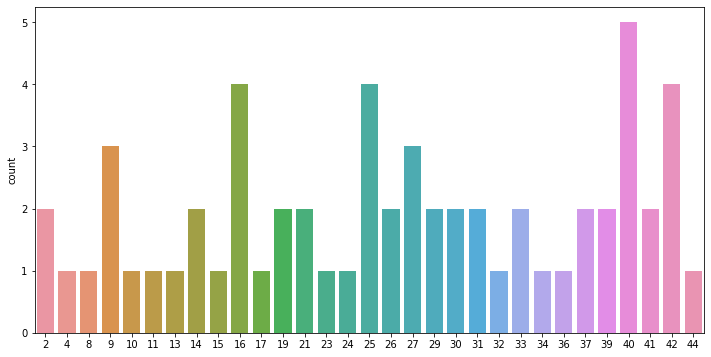

In [76]:
plt.figure(figsize = (12, 6))
sns.countplot(li)
plt.show()

### 네이버 키워드로 검색한 결과를 크롤링

In [89]:
# url 정의
content_list = ['이상한 변호사 우영우', '탑건', '범죄도시', '오징어게임']

desc = []

for content in content_list:
    url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query={}'.format(content)
    
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    
    resp = requests.get(url)
    html = BeautifulSoup(resp.text, 'html.parser')
    
    for item in html.select('div.text_expand > span.desc'):
        desc.append(item.text)
print(desc)

['천재적인 두뇌와 자폐스펙트럼을 동시에 가진 신입 변호사 우영우(박은빈 분)의 대형 로펌 생존기', ' [ 제주도의 푸른밤]   Composed by 최성원  Lyrics by 최성원  Arranged by 안신애   Piano 노영심  Guitar 정인성  Prgramming & Background vocals 안신애   Recorded at doobdoob studio  Mixed by 윤정오 at momo studio  Mastered by 박정언 at HONEYBUTTER studio  Cover Artwork by KT Y 아티스트 유보라 Cover Designed by 백서영 ', '최고의 파일럿이자 전설적인 인물 매버릭(톰 크루즈)은 자신이 졸업한 훈련학교 교관으로 발탁된다. 그의 명성을 모르던 팀원들은 매버릭의 지시를 무시하지만 실전을 방불케 하는 상공 훈련에서 눈으로 봐도 믿기 힘든 전설적인 조종 실력에 모두가 압도된다. 매버릭의 지휘아래 견고한 팀워크를 쌓아가던 팀원들에게 국경을 뛰어넘는 위험한 임무가 주어지자 매버릭은 자신이 가르친 동료들과 함께 마지막이 될 지 모를 하늘 위 비행에 나서는데…', '가리봉동 소탕작전 후 4년 뒤, 금천서 강력반은 베트남으로 도주한 용의자를 인도받아 오라는 미션을 받는다. 괴물형사 ‘마석도’(마동석)와 ‘전일만’(최귀화) 반장은 현지 용의자에게서 수상함을 느끼고, 그의 뒤에 무자비한 악행을 벌이는 ‘강해상’(손석구)이 있음을 알게 된다. ‘마석도’와 금천서 강력반은 한국과 베트남을 오가며 역대급 범죄를 저지르는 ‘강해상’을 본격적으로 쫓기 시작하는데... 나쁜 놈들 잡는 데 국경 없다! 통쾌하고 화끈한 범죄 소탕 작전이 다시 펼쳐진다!', '456억 원의 상금이 걸린 의문의 서바이벌에 참가한 사람들이 최후의 승자가 되기 위해 목숨을 걸고 극한의 게임에 도전하는 이야기를 담은 넷플릭스 시리즈']


## 크롤링 결과에서 html 속성 접근

가져온 데이터에 접근을 하는 방식 자체는 판다스 색인처럼 결과값을 확인하며 진행하는 것이 가장 좋습니다.

## 관심있는 개별종목의 시가총액, 외국인 소진률, PER, PBR 가져오기 실습

In [138]:
# url 정의
url = 'https://finance.naver.com/item/main.naver?code=005930'
# requests 요청
resp = requests.get(url)

# html 변환
html = BeautifulSoup(resp.text, 'html.parser')

In [147]:
# 시가총액, 외국인소진률, PER, PBR
# 시가총액
li = []
# 시가총액
a = html.select('em#_market_sum')[0].text.strip()
a = a.replace('\n', '')
a = a.replace('\t', '')
li.append(a)

# 외국인소진율(경로셀렉터)
print(html.select('#tab_con1 > div:nth-child(3) > table > tr:nth-child(1) > td > em'))
 
# li.append(b)

# # per
# c = html.select('td > em#_per')[0].text
# li.append(c)

# # pbr
# d = html.select('td > em#_pbr')[0].text
# li.append(d)

# # 종목명
# print(li)

[]


#### 여러 종목의 시가총액, 외국인 소진률, PER, PBR 한꺼번에 가져오기

In [137]:
# 종목리스트 정의
content_list = ['005930', '002020', '323410']

li = []

for content in content_list:
    # url 정의
    url = f'https://finance.naver.com/item/main.naver?code={content}'
    
    # 딜레이 시간 -> 난수 이용해서 딜레이 시간 반복마다 다르게 
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    
    # requests 요청
    resp = requests.get(url)
    
    # html 변환
    html = BeautifulSoup(resp.text, 'html.parser')
    
    # 시가총액
    a = html.select('em#_market_sum')[0].text.strip()
    a = a.replace('\n', '')
    a = a.replace('\t', '')
    li.append(a)

    # 외국인소진율(경로셀렉터)
    b = html.select('div.gray > table.lwidth > tr > td > em')[2].text
    li.append(b)

    # per
    c = html.select('td > em#_per')[0].text
    li.append(c)

    # pbr
    d = html.select('td > em#_pbr')[0].text
    li.append(d)
    
n = np.array(li).reshape(-1, 4) # 4열로 하고 행은 알아서 해줘라
df = pd.DataFrame(data = n, 
                  index = content_list, 
                  columns = ['시가총액', '외국인소진율', 'per', 'pbr'])

df

,시가총액,외국인소진율,per,pbr
005930,"340조8,746",49.76%,8.66,1.22
002020,"3,239",10.17%,2.72,0.39
323410,"12조2,015",13.63%,56.76,2.19


[['462조6,581', '51.98%', '16.32', '1.92'],
 ['5,145', '11.36%', '3.64', '0.67'],
 ['32조2,118', '5.45%', '219.42', '9.55']]

In [32]:
# 데이터프레임 제작


,시가총액,외국인소진률,PER,PBR
삼성전자,"462조6,581",51.98%,16.32,1.92
코오롱,"5,145",11.36%,3.64,0.67
카카오뱅크,"32조2,118",5.45%,219.42,9.55


## **동적페이지 크롤링**
> 최근에는 Js로 변경이 되며 일반적인 크롤링이 되지 않는 경우가 많음  
동적페이지와 숨겨진 url을 가져오는 방법을 알아봅니다

### 네이버 주식 시세 데이터 크롤링

In [96]:
# 동적페이지의 숨은 URL
# 동적페이지에 요청을 할 때 웹 정책에 필요한 정보를 같이 전달을 해줘야 함.


# requests 요청시에 헤더정보 추가

# html 변환

# 정보선별

# df 제작


,종가,전일비,시가,고가,저가,거래량
2022.05.19,"111,000","2,500","110,500","112,500","110,000","3,680,049"
2022.05.18,"113,500","1,000","114,000","115,000","113,000","3,570,113"
2022.05.17,"112,500","2,000","111,000","113,000","110,500","2,056,143"
2022.05.16,"110,500","2,000","113,500","114,000","110,000","3,930,044"
2022.05.13,"112,500","3,500","109,000","112,500","109,000","4,003,349"
2022.05.12,"109,000","1,500","109,500","111,500","108,500","4,132,948"
2022.05.11,"110,500",500,"110,500","112,500","108,000","3,658,168"
2022.05.10,"110,000","2,500","107,000","111,000","107,000","4,141,923"
2022.05.09,"107,500",0,"107,000","109,000","106,500","2,203,472"
2022.05.06,"107,500","2,000","108,000","108,500","106,500","2,566,813"


#### 20페이지 주가 정보 크롤링 해서 종가 그래프 출력

In [100]:
# 헤더정보 정의 (동적페이지 헤더정보 그대로 사용)

# 인덱스 정의

# 전체 가격 데이터 빈 데이터 프레임

# requests 요청시에 헤더정보 추가

# html 변환

# 날짜 인덱스 살려서 활용하기

# 가격정보 추출

# 데이터프레임 제작
pd.concat(df, temp_df)

1페이지 크롤링 중
2페이지 크롤링 중
3페이지 크롤링 중
4페이지 크롤링 중
5페이지 크롤링 중
6페이지 크롤링 중
7페이지 크롤링 중
8페이지 크롤링 중
9페이지 크롤링 중
10페이지 크롤링 중
11페이지 크롤링 중
12페이지 크롤링 중
13페이지 크롤링 중
14페이지 크롤링 중
15페이지 크롤링 중
16페이지 크롤링 중
17페이지 크롤링 중
18페이지 크롤링 중
19페이지 크롤링 중
20페이지 크롤링 중


,종가,전일비,시가,고가,저가,거래량
2022.04.11,"111,500",500,"111,000","113,000","110,500","2,390,786"
2022.04.08,"112,000","1,500","113,000","114,000","110,500","4,268,316"
2022.04.07,"113,500",500,"111,500","114,500","110,500","5,027,865"
2022.04.06,"113,000","3,500","114,500","115,500","113,000","4,541,938"
2022.04.05,"116,500",500,"117,500","118,000","116,000","2,101,474"
2022.04.04,"117,000","1,000","115,000","117,500","114,500","2,470,792"
2022.04.01,"116,000","2,000","117,000","117,500","116,000","3,851,558"
2022.03.31,"118,000","3,000","119,500","120,000","117,500","4,558,063"
2022.03.30,"121,000","1,000","123,000","123,000","120,500","3,436,282"
2022.03.29,"120,000","2,000","119,500","120,500","118,500","3,375,247"


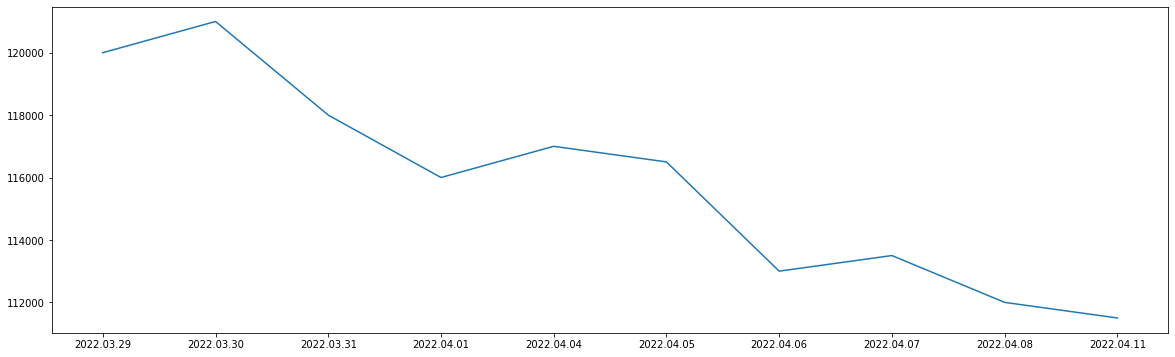

In [243]:
# 종가 그래프 출력(str)


### JSON 파싱
> 동적페이지 크롤링의 경우에는 일반적인 HTML text 형태의 데이터만을 사용하지 않습니다.  
JSON, xml 형식의 데이터도 통신에 사용하기에 요청결과값에 따른 처리가 필요합니다.

### 다음 주식 일자별 주가 데이터 크롤링 연습

,symbolCode,date,tradePrice,tradeTime,change,changePrice,changeRate,prevClosingPrice,exchangeCountry,openingPrice,highPrice,lowPrice,accTradePrice,accTradeVolume,periodTradePrice,periodTradeVolume,listedSharesCount
0,A005930,2022-05-19 15:30:23,67500.0,15:30:23,FALL,600.0,-0.008811,68100.0,KOREA,66500.0,67600.0,66500.0,1147743790508,17073727,1147743790508,17073727,None
1,A005930,2022-05-18 15:30:14,68100.0,15:30:14,RISE,500.0,0.007396,67600.0,KOREA,68300.0,68700.0,67600.0,1122585202585,16486319,1122585202585,16486319,None
2,A005930,2022-05-17 15:30:21,67600.0,15:30:21,RISE,1300.0,0.019608,66300.0,KOREA,66600.0,67900.0,66600.0,1058322764800,15680447,1058322764800,15680447,None
3,A005930,2022-05-16 15:30:27,66300.0,15:30:27,FALL,200.0,-0.003008,66500.0,KOREA,67100.0,67400.0,66100.0,796060691900,11937555,796060691900,11937555,None
4,A005930,2022-05-13 15:30:18,66500.0,15:30:18,RISE,1600.0,0.024653,64900.0,KOREA,65300.0,66700.0,65200.0,962476162900,14551536,962476162900,14551536,None
5,A005930,2022-05-12 15:30:14,64900.0,15:30:14,FALL,800.0,-0.012177,65700.0,KOREA,65200.0,65500.0,64900.0,1069685385550,16414188,1069685385550,16414188,None
6,A005930,2022-05-11 15:30:01,65700.0,15:30:01,EVEN,0.0,0.000000,65700.0,KOREA,65500.0,66300.0,65200.0,812298026600,12330920,812298026600,12330920,None
7,A005930,2022-05-10 15:30:16,65700.0,15:30:16,FALL,400.0,-0.006051,66100.0,KOREA,65900.0,66300.0,65300.0,1132067708900,17235605,1132067708900,17235605,None
8,A005930,2022-05-09 15:30:29,66100.0,15:30:29,FALL,400.0,-0.006015,66500.0,KOREA,66300.0,66900.0,66100.0,787562955000,11858736,787562955000,11858736,None
9,A005930,2022-05-06 15:30:15,66500.0,15:30:15,FALL,1400.0,-0.020619,67900.0,KOREA,67000.0,67100.0,66500.0,957335193600,14356156,957335193600,14356156,None


### 네이버 데이터랩 인기검색어 크롤링

## APIs
> 어플리케이션  
웹 서비스 제공자가 사용자에게 정보를 제공하기 위한 통신프로그램  
일반적인 API의 경우 requests -> response 형태의 크롤링 방법과 동일한 형태를 취한다.  

### 네이버 파파고 API

In [1]:
app_id = 'qnCaumqFm0WGvzJFKjLX'
app_pw = 'H1y6GgIcAT'

In [10]:
url = 'https://openapi.naver.com/v1/papago/n2mt'

import requests
from bs4 import BeautifulSoup

data = {
    "source" : "ko",
    "target" : "en",
    "text" : input()
}

header = {
    "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
    "X-Naver-Client-Id": f"{app_id}",
    "X-Naver-Client-Secret": f"{app_pw}"
}

resp = requests.post(url, headers = header, data = data)
resp.text

나는 속초에서 2박 3일 동안 놀다가 왔습니다.


'{"message":{"result":{"srcLangType":"ko","tarLangType":"en","translatedText":"I played in Sokcho for 2 nights and 3 days.","engineType":"N2MT","pivot":null,"dict":null,"tarDict":null},"@type":"response","@service":"naverservice.nmt.proxy","@version":"1.0.0"}}'

In [11]:
import json

data = json.loads(resp.text)
data['message']['result']['translatedText']

'I played in Sokcho for 2 nights and 3 days.'

### 공공데이터 API

In [23]:
import requests

url = 'http://apis.data.go.kr/3130000/openapi/sns/getsns'
params ={'serviceKey' : 'bZ4RDY5WTSnuUoVIfG5vkqmusU6U7cLJ/wpihMUQD0gzjWzvgb1OYUXfEmIdenSpwU9ATFxbv+2itNJXhwJ2fw==',
         'type' : 'Json'
}

response = requests.get(url, params=params)
print(response.text)

{"resultCode":"0","resultMsg":"SUCCESS","numOfRows":10,"pageNo":0,"totalCount":377,"items":[{"date":"2018-07-01","positive":"2956","negative":"648","neutral":"295","addr":"홍대 걷고 싶은 거리"},{"date":"2018-08-01","positive":"2247","negative":"111","neutral":"200","addr":"홍대 걷고 싶은 거리"},{"date":"2018-09-01","positive":"3602","negative":"635","neutral":"436","addr":"홍대 걷고 싶은 거리"},{"date":"2018-10-01","positive":"2827","negative":"394","neutral":"623","addr":"홍대 걷고 싶은 거리"},{"date":"2018-11-01","positive":"2004","negative":"356","neutral":"583","addr":"홍대 걷고 싶은 거리"},{"date":"2018-12-01","positive":"1457","negative":"223","neutral":"173","addr":"홍대 걷고 싶은 거리"},{"date":"2019-01-01","positive":"1444","negative":"143","neutral":"127","addr":"홍대 걷고 싶은 거리"},{"date":"2019-02-01","positive":"6886","negative":"215","neutral":"220","addr":"홍대 걷고 싶은 거리"},{"date":"2019-03-01","positive":"1945","negative":"175","neutral":"160","addr":"홍대 걷고 싶은 거리"},{"date":"2019-04-01","positive":"1773","negative":"90","neutra

In [25]:
data = json.loads(response.text)
data

{'resultCode': '0',
 'resultMsg': 'SUCCESS',
 'numOfRows': 10,
 'pageNo': 0,
 'totalCount': 377,
 'items': [{'date': '2018-07-01',
   'positive': '2956',
   'negative': '648',
   'neutral': '295',
   'addr': '홍대 걷고 싶은 거리'},
  {'date': '2018-08-01',
   'positive': '2247',
   'negative': '111',
   'neutral': '200',
   'addr': '홍대 걷고 싶은 거리'},
  {'date': '2018-09-01',
   'positive': '3602',
   'negative': '635',
   'neutral': '436',
   'addr': '홍대 걷고 싶은 거리'},
  {'date': '2018-10-01',
   'positive': '2827',
   'negative': '394',
   'neutral': '623',
   'addr': '홍대 걷고 싶은 거리'},
  {'date': '2018-11-01',
   'positive': '2004',
   'negative': '356',
   'neutral': '583',
   'addr': '홍대 걷고 싶은 거리'},
  {'date': '2018-12-01',
   'positive': '1457',
   'negative': '223',
   'neutral': '173',
   'addr': '홍대 걷고 싶은 거리'},
  {'date': '2019-01-01',
   'positive': '1444',
   'negative': '143',
   'neutral': '127',
   'addr': '홍대 걷고 싶은 거리'},
  {'date': '2019-02-01',
   'positive': '6886',
   'negative': '215'

In [26]:
import pandas as pd
df = pd.DataFrame(data['items'])
df

,date,positive,negative,neutral,addr
0,2018-07-01,2956,648,295,홍대 걷고 싶은 거리
1,2018-08-01,2247,111,200,홍대 걷고 싶은 거리
2,2018-09-01,3602,635,436,홍대 걷고 싶은 거리
3,2018-10-01,2827,394,623,홍대 걷고 싶은 거리
4,2018-11-01,2004,356,583,홍대 걷고 싶은 거리
5,2018-12-01,1457,223,173,홍대 걷고 싶은 거리
6,2019-01-01,1444,143,127,홍대 걷고 싶은 거리
7,2019-02-01,6886,215,220,홍대 걷고 싶은 거리
8,2019-03-01,1945,175,160,홍대 걷고 싶은 거리
9,2019-04-01,1773,90,103,홍대 걷고 싶은 거리
